# Practice Case 02 - Exploratory Data Analysis

Author: Billy Sagala
<br> Data Science Bootcamp - Home Credit Indonesia

![HCI_Logo](https://www.homecredit.co.id/HCID/media/images/images-share.png)


## Case Study: Bank Marketing

The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls.

### Data Import 

In [42]:
#Importing Library
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [13]:
#importing dataset
bank_mkt = pd.read_csv('bank-marketing-full.csv', sep = ";", engine ='python')

### Data Description 

#### Data Column

In [40]:
print(bank_mkt.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### Data Types

In [25]:
print("The data types of each column in the dataset, as below:",
      bank_mkt.dtypes)

The data types of each column in the dataset, as below: age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [43]:
#Grouping based of data types
numerical_data = bank_mkt.select_dtypes(include = [np.number]).columns
categorical_data = bank_mkt.select_dtypes(exclude = [np.number]).columns

In [46]:
print(numerical_data)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [53]:
print(categorical_data)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


### Data Shape

In [38]:
print("Data set consist of",len(bank_mkt.columns),"columns and",len(bank_mkt), "rows.")

Data set consist of 21 columns and 41188 rows.


In [54]:
#Checking for Null
n_null=bank_mkt.isnull().sum(axis=0).reset_index()\
.sort_values([0], ascending=False)
n_null

,index,0
0,age,0
11,campaign,0
19,nr.employed,0
18,euribor3m,0
17,cons.conf.idx,0
16,cons.price.idx,0
15,emp.var.rate,0
14,poutcome,0
13,previous,0
12,pdays,0


#### Remove Duplicates

In [55]:
bank_mkt_2 = bank_mkt.drop_duplicates()

In [61]:
bank_mkt_2.shape

(41176, 21)

In [59]:
bank_mkt_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Wrangling 

### Age

In [64]:
#Age data Description
bank_mkt_2.age.describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [71]:
bank_mkt_2.loc[bank_mkt_2.age.between(0,24),'age_group']='Below 25'
bank_mkt_2.loc[bank_mkt_2.age.between(25,35),'age_group']='25 - 35'
bank_mkt_2.loc[bank_mkt_2.age.between(36,45),'age_group']='36 - 45'
bank_mkt_2.loc[bank_mkt_2.age.between(46,55),'age_group']='46 - 55'
bank_mkt_2.loc[bank_mkt_2.age.between(56,65),'age_group']='56 - 65'
bank_mkt_2.loc[bank_mkt_2.age.between(66,98),'age_group']='Above 65'
bank_mkt_2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,36 - 45
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,36 - 45
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65


### Job 

In [78]:
bank_mkt_2.groupby('job').count()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
job,,,,,,,,,,,,,,,,,,,,,
admin.,10419,10419,10419,10419,10419,10419,10419,10419,10419,10419,...,10419,10419,10419,10419,10419,10419,10419,10419,10419,10419
blue-collar,9253,9253,9253,9253,9253,9253,9253,9253,9253,9253,...,9253,9253,9253,9253,9253,9253,9253,9253,9253,9253
entrepreneur,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,...,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
housemaid,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,...,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060
management,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,...,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924
retired,1718,1718,1718,1718,1718,1718,1718,1718,1718,1718,...,1718,1718,1718,1718,1718,1718,1718,1718,1718,1718
self-employed,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,...,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421
services,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967,...,3967,3967,3967,3967,3967,3967,3967,3967,3967,3967
student,875,875,875,875,875,875,875,875,875,875,...,875,875,875,875,875,875,875,875,875,875


### Marital 

In [79]:
bank_mkt_2.groupby('marital').count()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
marital,,,,,,,,,,,,,,,,,,,,,
divorced,4611,4611,4611,4611,4611,4611,4611,4611,4611,4611,...,4611,4611,4611,4611,4611,4611,4611,4611,4611,4611
married,24921,24921,24921,24921,24921,24921,24921,24921,24921,24921,...,24921,24921,24921,24921,24921,24921,24921,24921,24921,24921
single,11564,11564,11564,11564,11564,11564,11564,11564,11564,11564,...,11564,11564,11564,11564,11564,11564,11564,11564,11564,11564
unknown,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


### Education 

In [80]:
bank_mkt_2.groupby('education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
education,,,,,,,,,,,,,,,,,,,,,
basic.4y,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,...,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
basic.6y,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,...,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291
basic.9y,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,...,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
high.school,9512,9512,9512,9512,9512,9512,9512,9512,9512,9512,...,9512,9512,9512,9512,9512,9512,9512,9512,9512,9512
illiterate,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
professional.course,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240,...,5240,5240,5240,5240,5240,5240,5240,5240,5240,5240
university.degree,12164,12164,12164,12164,12164,12164,12164,12164,12164,12164,...,12164,12164,12164,12164,12164,12164,12164,12164,12164,12164
unknown,1730,1730,1730,1730,1730,1730,1730,1730,1730,1730,...,1730,1730,1730,1730,1730,1730,1730,1730,1730,1730


### Default 

In [81]:
#has credit in default
bank_mkt_2.groupby('default').count()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
default,,,,,,,,,,,,,,,,,,,,,
no,32577,32577,32577,32577,32577,32577,32577,32577,32577,32577,...,32577,32577,32577,32577,32577,32577,32577,32577,32577,32577
unknown,8596,8596,8596,8596,8596,8596,8596,8596,8596,8596,...,8596,8596,8596,8596,8596,8596,8596,8596,8596,8596
yes,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


###  Housing 

In [82]:
bank_mkt_2.groupby('housing').count()

,age,job,marital,education,default,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
housing,,,,,,,,,,,,,,,,,,,,,
no,18615,18615,18615,18615,18615,18615,18615,18615,18615,18615,...,18615,18615,18615,18615,18615,18615,18615,18615,18615,18615
unknown,990,990,990,990,990,990,990,990,990,990,...,990,990,990,990,990,990,990,990,990,990
yes,21571,21571,21571,21571,21571,21571,21571,21571,21571,21571,...,21571,21571,21571,21571,21571,21571,21571,21571,21571,21571


### Loan

In [84]:
bank_mkt_2.groupby('loan').count()

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
loan,,,,,,,,,,,,,,,,,,,,,
no,33938,33938,33938,33938,33938,33938,33938,33938,33938,33938,...,33938,33938,33938,33938,33938,33938,33938,33938,33938,33938
unknown,990,990,990,990,990,990,990,990,990,990,...,990,990,990,990,990,990,990,990,990,990
yes,6248,6248,6248,6248,6248,6248,6248,6248,6248,6248,...,6248,6248,6248,6248,6248,6248,6248,6248,6248,6248


In [92]:
#number of data with Unknown Record

print(len(bank_mkt_2[(bank_mkt_2.job=="unknown")|(bank_mkt_2.marital=="unknown")|(bank_mkt_2.education=="unknown")\
           |(bank_mkt_2.default=="unknown")|(bank_mkt_2.housing=="unknown")|(bank_mkt_2.loan=="unknown")]))

10698


In [95]:
#set of data without unknown record

bank_mkt_3 = bank_mkt_2[(bank_mkt_2.job!="unknown")&(bank_mkt_2.marital!="unknown")&(bank_mkt_2.education!="unknown")\
           &(bank_mkt_2.default!="unknown")&(bank_mkt_2.housing!="unknown")&(bank_mkt_2.loan!="unknown")]

In [97]:
bank_mkt_3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,36 - 45
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,36 - 45
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56 - 65


In [98]:
#shape of dataset after dropping the unknown records

print(len(bank_mkt_3))

30478


## Customer Description 

### Age

In [140]:
fig_age = px.histogram(bank_mkt_3, x ='age', nbins = 15)
fig_age.show()

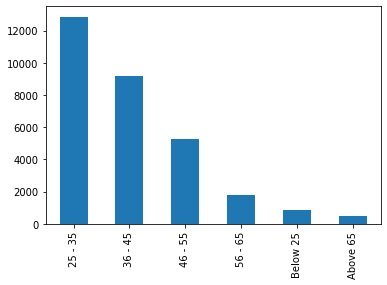

In [142]:
#bar chart

bank_mkt_3.age_group.value_counts().plot(kind='bar')

### Job 

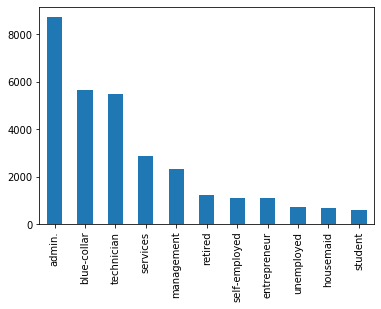

In [143]:
#bar chart

bank_mkt_3.job.value_counts().plot(kind='bar')

### Marital Status

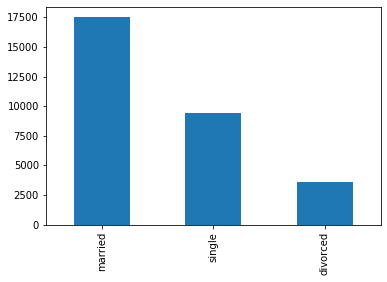

In [144]:
#bar chart

bank_mkt_3.marital.value_counts().plot(kind='bar')

### Education 

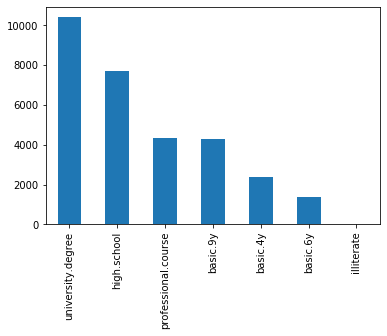

In [145]:
#bar chart

bank_mkt_3.education.value_counts().plot(kind='bar')

### Default 

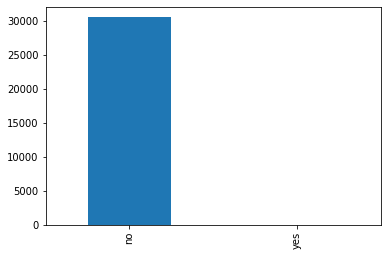

In [146]:
#bar chart

bank_mkt_3.default.value_counts().plot(kind='bar')

### Housing 

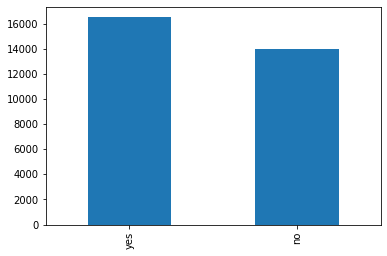

In [149]:
bank_mkt_3.housing.value_counts().plot(kind='bar')

### Loan 

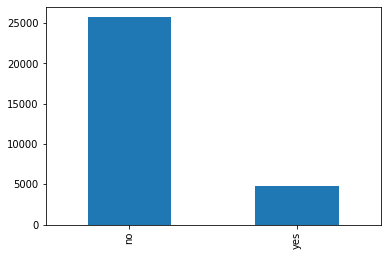

In [150]:
bank_mkt_3.loan.value_counts().plot(kind='bar')

## Identify Lucrative Customer 

__Defining the Lucrative Customer__
<br> Lucrative customer will be defined as Customer that subscribed a term deposit.

#### Subscription and Age Group 

In [170]:
x = bank_mkt_3.groupby(['age_group','y'])\
.size().reset_index()
x1 = x.groupby(['age_group'])[0].sum().reset_index()
x = x.merge(x1,how='left',on = 'age_group')
x['perc'] = np.round(x['0_x']/x['0_y']*100,2)
x[x.y=="yes"].sort_values(by=['perc'],ascending=False)

,age_group,y,0_x,0_y,perc
9,Above 65,yes,229,497,46.08
11,Below 25,yes,199,863,23.06
7,56 - 65,yes,352,1812,19.43
1,25 - 35,yes,1627,12860,12.65
5,46 - 55,yes,565,5263,10.74
3,36 - 45,yes,886,9183,9.65


In [165]:
fig_age_y = px.bar(x, x='age_group', y = 'perc', color = 'y', barmode = 'group')
fig_age_y.show()

Highest percentage of Term Deposit Subscription is by Customers with __Above 65__ age group, the lowest percentage is Customers within __36-45__ age group. 

#### Subscription and Marital

In [171]:
x2 = bank_mkt_3.groupby(['marital','y'])\
.size().reset_index()
x3 = x2.groupby(['marital'])[0].sum().reset_index()
x2 = x2.merge(x3,how='left',on = 'marital')
x2['perc'] = np.round(x2['0_x']/x2['0_y']*100,2)
x2[x2.y=="yes"].sort_values(by=['perc'],ascending=False)

,marital,y,0_x,0_y,perc
5,single,yes,1393,9439,14.76
3,married,yes,2055,17487,11.75
1,divorced,yes,410,3552,11.54


In [174]:
fig_age_y1 = px.bar(x2, x='marital', y = 'perc', color = 'y', barmode = 'group')
fig_age_y1.show()

No significance difference of subscription based on marital status.

#### Subscription and Education 

In [175]:
x4 = bank_mkt_3.groupby(['education','y'])\
.size().reset_index()
x5 = x4.groupby(['education'])[0].sum().reset_index()
x4 = x4.merge(x5,how='left',on = 'education')
x4['perc'] = np.round(x4['0_x']/x4['0_y']*100,2)
x4[x4.y=="yes"].sort_values(by=['perc'],ascending=False)

,education,y,0_x,0_y,perc
9,illiterate,yes,3,11,27.27
13,university.degree,yes,1541,10408,14.81
1,basic.4y,yes,326,2380,13.70
11,professional.course,yes,538,4318,12.46
7,high.school,yes,934,7697,12.13
3,basic.6y,yes,136,1388,9.80
5,basic.9y,yes,380,4276,8.89


In [178]:
fig_age_y2 = px.bar(x4, x='education', y = 'perc', color = 'y', barmode = 'group')
fig_age_y2.show()

The highest subscription rate comes from illiterate customers, hence, considering the little data size compared to other education degree, we could not take conclusion of subscription rate from this. 

#### Subscription and Housing

In [182]:
x6 = bank_mkt_3.groupby(['housing','y'])\
.size().reset_index()
x7 = x6.groupby(['housing'])[0].sum().reset_index()
x6 = x6.merge(x7,how='left',on = 'housing')
x6['perc'] = np.round(x6['0_x']/x6['0_y']*100,2)
x6[x6.y=="yes"].sort_values(by=['perc'],ascending=False)

,housing,y,0_x,0_y,perc
3,yes,yes,2142,16516,12.97
1,no,yes,1716,13962,12.29


In [184]:
fig_age_y3 = px.bar(x6, x='housing', y = 'perc', color = 'y', barmode = 'group')
fig_age_y3.show()

No significance difference of subscription rate based on housing.

#### Subscription and Loan 

In [185]:
x8 = bank_mkt_3.groupby(['loan','y'])\
.size().reset_index()
x9 = x8.groupby(['loan'])[0].sum().reset_index()
x8 = x8.merge(x9,how='left',on = 'loan')
x8['perc'] = np.round(x8['0_x']/x8['0_y']*100,2)
x8[x8.y=="yes"].sort_values(by=['perc'],ascending=False)

,loan,y,0_x,0_y,perc
1,no,yes,3273,25710,12.73
3,yes,yes,585,4768,12.27


No significance difference of subscription rate based on personal loan history.

#### Subscription and  Contact Communication Type

In [186]:
x10 = bank_mkt_3.groupby(['contact','y'])\
.size().reset_index()
x11 = x10.groupby(['contact'])[0].sum().reset_index()
x10 = x10.merge(x11,how='left',on = 'contact')
x10['perc'] = np.round(x10['0_x']/x10['0_y']*100,2)
x10[x10.y=="yes"].sort_values(by=['perc'],ascending=False)

,contact,y,0_x,0_y,perc
1,cellular,yes,3272,20435,16.01
3,telephone,yes,586,10043,5.83


In [187]:
fig_age_y4 = px.bar(x10, x='contact', y = 'perc', color = 'y', barmode = 'group')
fig_age_y4.show()

Highest percentage of Term Deposit Subscription is by Customers with contact communication type __cellular__ .

#### Subscription and number of contacts performed during this campaign 

In [199]:
fig_campaign = px.box(bank_mkt_3, y="campaign",x= "y")
fig_campaign.show()

Highest subscription on lesser number of conatct on current campaign.

#### Subscription and Number of Contact on Previous Campaign

In [200]:
fig_previous = px.box(bank_mkt_3, y="previous",x= "y")
fig_previous.show()

Higher Subscription with lesser contact on previous campaign.

In [201]:
bank_mkt_3.month.value_counts()

may    9731
jul    5077
aug    4672
jun    3614
nov    3495
apr    2114
oct     641
sep     495
mar     482
dec     157
Name: month, dtype: int64

#### Subscription and Month 

In [207]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7,\
              "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

bank_mkt_3["month_no"] = bank_mkt_3["month"].apply(lambda x: month_dict[x])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [229]:

x12 = bank_mkt_3.groupby(['month_no','y'])\
.size().reset_index()
x13 = x12.groupby(['month_no'])[0].sum().reset_index()
x12 = x12.merge(x13,how='left',on = 'month_no')
x12['perc'] = np.round(x12['0_x']/x12['0_y']*100,2)
x13  = x12[x12.y=="yes"]
x13

,month_no,y,0_x,0_y,perc
1,3,yes,246,482,51.04
3,4,yes,468,2114,22.14
5,5,yes,700,9731,7.19
7,6,yes,452,3614,12.51
9,7,yes,511,5077,10.06
11,8,yes,533,4672,11.41
13,9,yes,222,495,44.85
15,10,yes,287,641,44.77
17,11,yes,365,3495,10.44
19,12,yes,74,157,47.13


In [230]:
line_month = px.line(x13, x='month_no', y='perc',color = 'y')
line_month.show()

Subscription rate is cyclical on the year.